## Training the different Tic Tac Toe Players
In this notebook we will train and evaluate different players of the game Tic Tac Toe.

In [1]:
import matplotlib.pyplot as plt
from Players import RandomPlayer, MiniMaxPlayer, AlphaBetaPlayer, QPlayer, SmartPlayer
from Game import TicTacToe

import numpy as np

In [3]:
def train(player1, player2, rounds=10, battles=10):
    game = TicTacToe(player1, player2)
    count, player1wins, player2wins, draws = game.train(rounds, battles)

    plt.figure(figsize=(10,5))
    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, player1wins, 'g-', label='{} wins'.format(player1.name))
    plt.plot(count, player2wins, 'b-', label='{} wins'.format(player2.name))
    plt.plot(count, draws, 'r-', label='Draw')

    plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.12), shadow=False, fancybox=True, framealpha=0.3, ncol=3)
    plt.show()

In [ ]:
SmartPlayer1 = SmartPlayer(lr=0.5)

SmartPlayer1.savePolicy()

train(SmartPlayer1, RandomPlayer(), rounds=100, battles=100)

  0%|          | 0/100 [00:00<?, ?it/s]

SmartPlayerBrain(
  (_layers): ModuleList(
    (0): Linear(in_features=9, out_features=81, bias=True)
    (1): Linear(in_features=81, out_features=9, bias=True)
  )
  (_dropout): Dropout(p=0.3, inplace=False)
  (_activation): ReLU()
)
SmartPlayerBrain(
  (_layers): ModuleList(
    (0): Linear(in_features=9, out_features=81, bias=True)
    (1): Linear(in_features=81, out_features=9, bias=True)
  )
  (_dropout): Dropout(p=0.3, inplace=False)
  (_activation): ReLU()
)


 17%|█▋        | 17/100 [00:08<00:41,  1.99it/s]

## 1. Random choice opponent

100%|██████████| 100/100 [00:04<00:00, 20.97it/s]


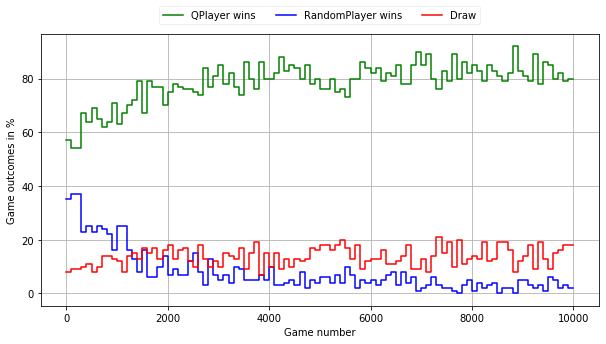

In [17]:
QPlayer1 = QPlayer(lr=0.9, lrdecay=0.95, exploration=0.1, explorationdecay=0.99)

train(QPlayer1, RandomPlayer(), rounds=100, battles=100)

## 2. Minimax algorithm with $\alpha \beta$ - pruning

100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


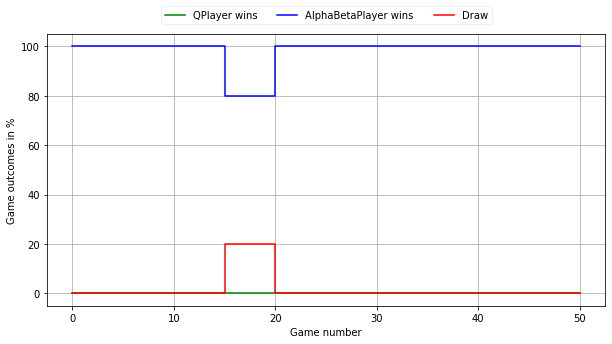

In [3]:
QPlayer2 = QPlayer(lr=0.7, lrdecay=0.95, exploration=0.3, explorationdecay=0.95)

train(QPlayer2, AlphaBetaPlayer(), rounds=10, battles=5)
QPlayer2.savePolicy()

# 3. Playing against one's own

100%|██████████| 100/100 [00:06<00:00, 15.47it/s]


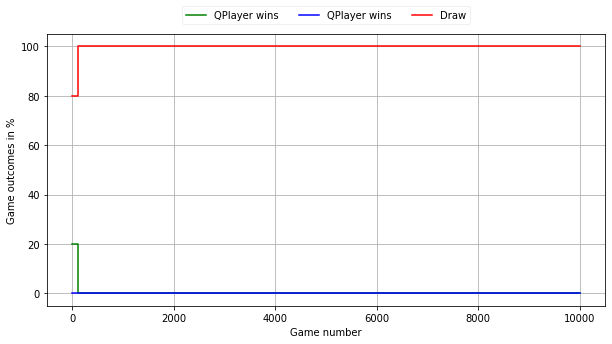

In [19]:
train(QPlayer1, QPlayer2, rounds=100, battles=100)

100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


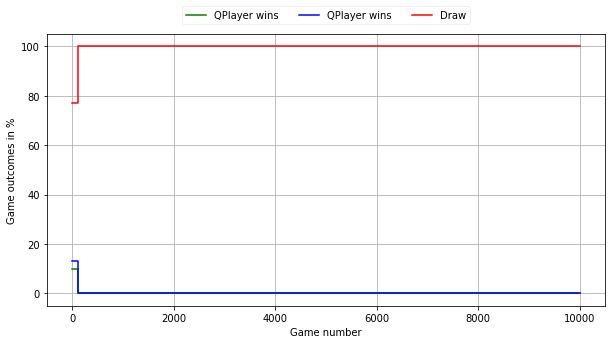

In [20]:
QPlayer3 = QPlayer(lr=0.9, lrdecay=0.9, exploration=1.0, explorationdecay=0.9)
QPlayer4 = QPlayer(lr=0.9, lrdecay=0.9, exploration=1.0, explorationdecay=0.9)

train(QPlayer3, QPlayer4, rounds=100, battles=100)

# 4. A player with a real brain